In [5]:
import chess
import chess.uci
import chess.pgn
import os
import csv
import matplotlib.pyplot as plt
from numpy import array
import numpy as np
import pandas as pd
import math
import ast
from random import shuffle

In [103]:
pd.set_option('display.max_colwidth', -1)
performances_file = "/Users/tylerahlstrom/Documents/GitHub/DI_proposal/data/stockfish_performances_fivesecondsxxxx.csv"

df = pd.read_csv(performances_file)
# with open(performances_file, 'r') as f:
#     for line in f:
#         listobj = ast.literal_eval(line)
#         elo_and_p.append(listobj)
df.head(3)

elo  opp_elo piece_color                                        opening  \
0  1833  1799     White       Scandinavian Defense: Mieses-Kotroc Variation   
1  1799  1833     Black       Scandinavian Defense: Mieses-Kotroc Variation   
2  1708  1556     White       Modern Defense                                  

   eco  result  engine_eval_time game_type termination  \
0  B01  0.0     0.05              300+0     Normal       
1  B01  1.0     0.05              300+0     Normal       
2  A41  1.0     0.05              300+3     Normal       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       chosen_moves_eval  \
0  [{'move': 'e2e4', 'move_rank': 2, 'num_move_options': 20, 'move_eval': -70}, {'move': 'e4d5', 'move_rank': 1, 'num_move_options': 31, 'move_eval': 44}, {'move': 'b1c3', 'move_rank': 1, 'num_move_options': 29, 'move_eval': -31}, {'move': 'd2d4', 'move_rank': 2, 'num_move_options': 32, 'move_eval': -15}, {'move': 'g2g4', 'move_rank': 2, 'num_move_options': 39, 'move_eval': -33}, {'move': 'h2h4', 'move_rank': 10, 'num_move_options': 38, 'move_eval': -56}, {'move': 'f2f4', 'move_rank': 2, 'num_move_options': 39, 'move_eval': -52}, {'move': 'g1f3', 'move_rank': 2, 'num_move_options': 36, 'move_eval': -40}, {'move': 'f3e5', 'move_rank': 3, 'num_move_options': 39, 'move_eval': -60}, {'move': 'e5g6', 'move_rank': 2, 'num_move_options': 42, 'move_eval': -21}, {'move': 'f1c4', 'move_rank': 4, 'num_move_options': 35, 'move_eval': -156}, {'move': 'c3e4', 'move_rank': 3, 'num_move_options': 38, 'move_eval': -16}, {'move': 'c4e6', 'move_rank': 1, 'num_move_options': 40, 'move_eval': 5}, {'move': 'd1e2', 'move_rank': 2, 'num_move_options': 42, 'move_eval': -12}, {'move': 'e4f6', 'move_rank': 6, 'num_move_options': 48, 'move_eval': -95}, {'move': 'e6d5', 'move_rank': 20, 'num_move_options': 42, 'move_eval': -271}, {'move': 'b2b3', 'move_rank': 23, 'num_move_options': 45, 'move_eval': -300}, {'move': 'd5c6', 'move_rank': 4, 'num_move_options': 45, 'move_eval': -147}, {'move': 'e2e7', 'move_rank': 22, 'num_move_options': 37, 'move_eval': -816}, {'move': 'e7e8', 'mo

In [119]:
def get_move_options_evals(options_dict, plot = False):
    rank = []
    score = []
    for key, value in options_dict.items():
        rank.append(value['rank'])
        score.append(value['move_score'])
    if plot:
        plt.bar(rank, score)
        plt.show()
    return rank, score

In [159]:
def get_moves_made_evals(moves_made_dict, plot = False):
    ranks = []
    num_options = []
    evals = [] 
    for entry in moves_made_dict:
        ranks.append(entry['move_rank'])
        num_options.append(entry['num_move_options'])
        evals.append(entry['move_eval'])
    if plot:
        move_num = []
        rank_perc = []
        for i in range(len(ranks)):
            move_num.append(i+1)
            rank_perc.append(ranks[i]/num_options[i])
            if ranks[i] == 1:
                rank_perc[i] = 0.01
        plt.bar(move_num, rank_perc)
        plt.show()
    
    return ranks, num_options, evals

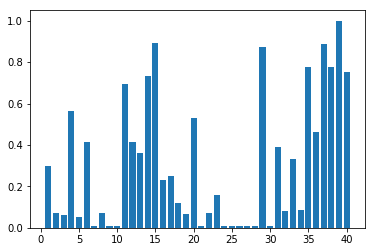

([6,
  2,
  3,
  22,
  2,
  17,
  1,
  3,
  1,
  1,
  18,
  12,
  9,
  22,
  25,
  6,
  5,
  3,
  2,
  18,
  1,
  2,
  4,
  1,
  1,
  1,
  1,
  1,
  21,
  1,
  7,
  2,
  8,
  2,
  14,
  6,
  8,
  7,
  9,
  6],
 [20,
  28,
  47,
  39,
  40,
  41,
  41,
  43,
  32,
  30,
  26,
  29,
  25,
  30,
  28,
  26,
  20,
  25,
  31,
  34,
  24,
  28,
  25,
  32,
  32,
  34,
  35,
  22,
  24,
  4,
  18,
  25,
  24,
  23,
  18,
  13,
  9,
  9,
  9,
  8],
 [-70,
  -29,
  -50,
  -120,
  -27,
  -124,
  -22,
  -384,
  -20,
  -55,
  -147,
  -102,
  -45,
  -120,
  -199,
  -34,
  -142,
  -5,
  -39,
  -162,
  -5,
  -21,
  -54,
  9,
  31,
  25,
  2,
  7,
  -938,
  -5,
  -115,
  -36,
  -272,
  -19,
  -853,
  -21,
  -87,
  -50,
  -144,
  -4387])

In [165]:
moves_made = df.chosen_moves_eval.head(10)
mm = moves_made[7]
mm = ast.literal_eval(mm)
get_moves_made_evals(mm, plot = True)

In [128]:
av_eval = df.available_moves_eval.head(2)
av_eval = av_eval[1]
av_eval = ast.literal_eval(av_eval)
move_1_options = av_eval[7]
move_1_options

{'a7a5': {'move_score': -192, 'rank': 16},
 'a7a6': {'move_score': -107, 'rank': 10},
 'b7b5': {'move_score': -285, 'rank': 19},
 'b7b6': {'move_score': -288, 'rank': 20},
 'b8a6': {'move_score': -203, 'rank': 17},
 'b8c6': {'move_score': -26, 'rank': 1},
 'b8d7': {'move_score': -147, 'rank': 13},
 'c7c5': {'move_score': -157, 'rank': 14},
 'c7c6': {'move_score': -97, 'rank': 7},
 'd8c8': {'move_score': -179, 'rank': 15},
 'd8d4': {'move_score': -1077, 'rank': 36},
 'd8d5': {'move_score': -969, 'rank': 35},
 'd8d6': {'move_score': -119, 'rank': 12},
 'd8d7': {'move_score': -293, 'rank': 22},
 'd8e7': {'move_score': -112, 'rank': 11},
 'd8f6': {'move_score': -218, 'rank': 18},
 'd8g5': {'move_score': -1161, 'rank': 38},
 'd8h4': {'move_score': -1150, 'rank': 37},
 'e6e5': {'move_score': -319, 'rank': 24},
 'e8d7': {'move_score': -439, 'rank': 29},
 'e8e7': {'move_score': -487, 'rank': 30},
 'f7f5': {'move_score': -308, 'rank': 23},
 'f7f6': {'move_score': -289, 'rank': 21},
 'f8a3': {'m

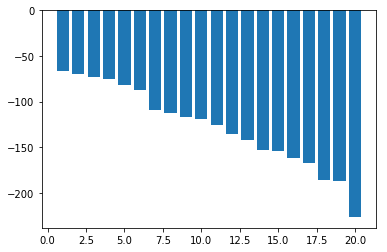

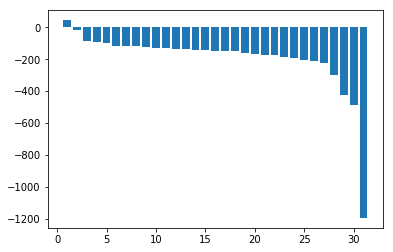

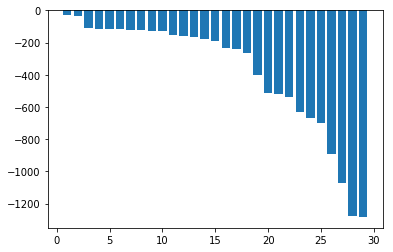

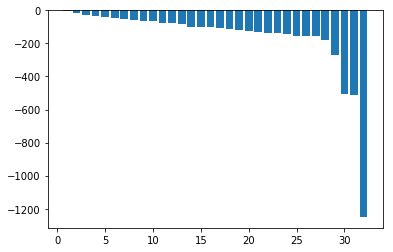

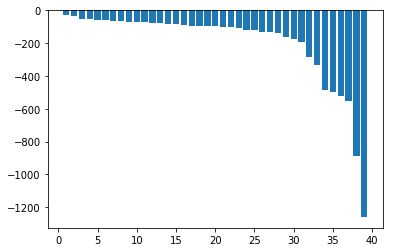

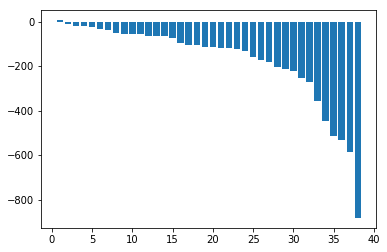

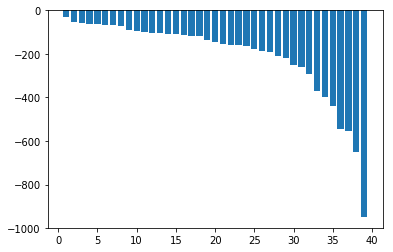

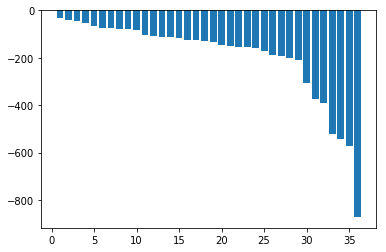

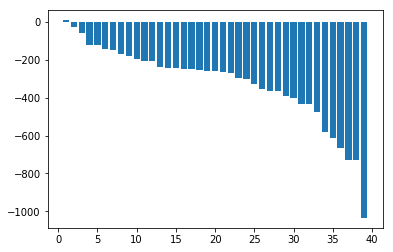

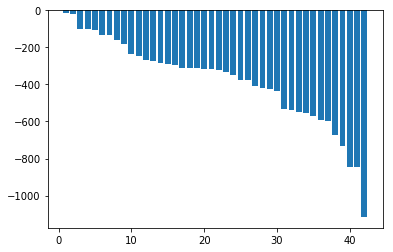

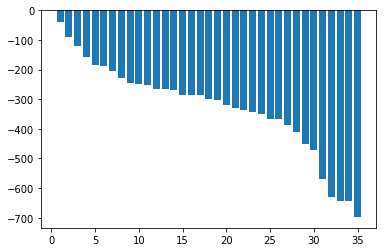

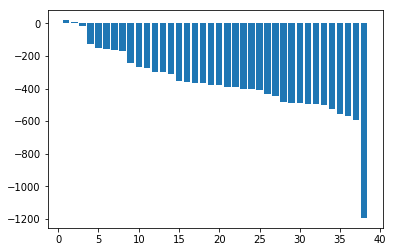

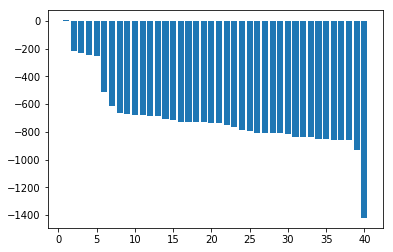

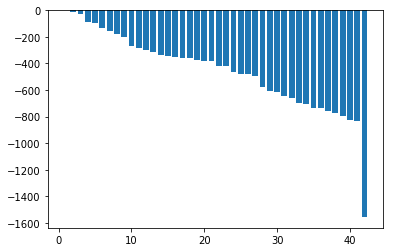

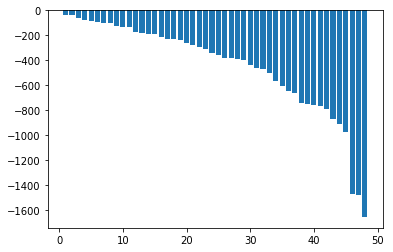

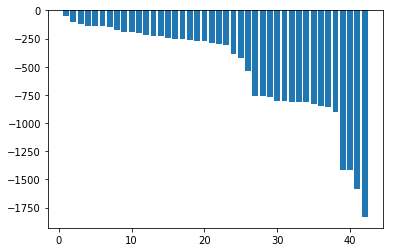

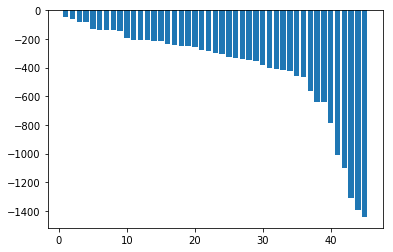

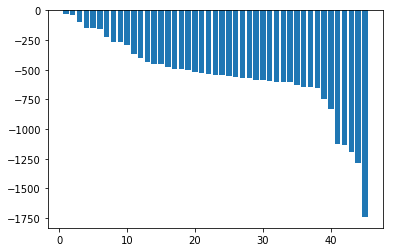

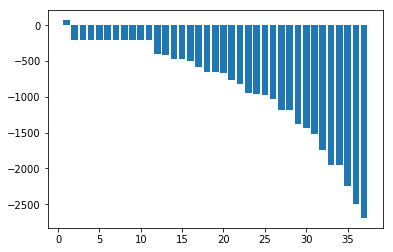

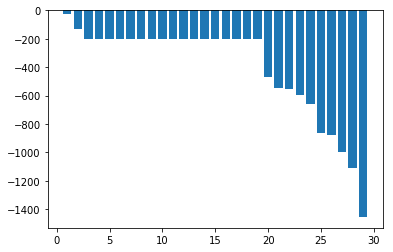

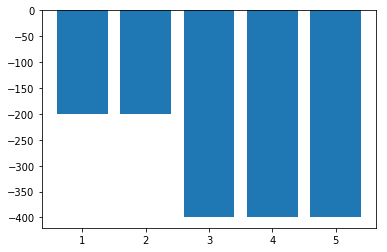

In [123]:
for move in ld:
    get_move_options_evals(move, plot = True)